In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score, f1_score


## 1. Dataset: breast cancer dataset

In [2]:
df=pd.read_csv("breast_cancer.csv")

df

,1,2,3,4,5,6,7,8,9,10,11
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## 2. Rename columns as 'Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'

In [3]:
df.columns = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
                'Uniformity_Cell_Shape', 'Marginal_Adhesion',
                'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
                'Normal_Nucleoli', 'Mitoses', 'Class']

df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## 3. Drop redundant columns

In [4]:
df.drop('Id', axis=1, inplace=True)

df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


## 4. View the summary of the dataset

In [5]:
print("Summary of the dataset:")
print(df.describe())
print()
print("Summary of the dataset:")
print(df.info())

Summary of the dataset:
       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count       699.000000            699.000000             699.000000   
mean          4.417740              3.134478               3.207439   
std           2.815741              3.051459               2.971913   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bland_Chromatin  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.438364   
min             1.000000                

## 6. Convert the data type of Bare_Nuclei to an integer

In [6]:
def replace_with_0(x):
    if(x=='?'):
        return 0
    else:
        return x
df["Bare_Nuclei"]=df["Bare_Nuclei"].apply(replace_with_0)
df["Bare_Nuclei"]=df["Bare_Nuclei"].astype(int)

df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


## 7. Check data types of columns of data frame

In [7]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Clump_thickness                int64
Uniformity_Cell_Size           int64
Uniformity_Cell_Shape          int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int32
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


## 8. Identify Missing values, NAN in variables

In [8]:
print("Missing values count:")
print(df.isnull().sum())

Missing values count:
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


## 9. Check the distribution of variables using histograms

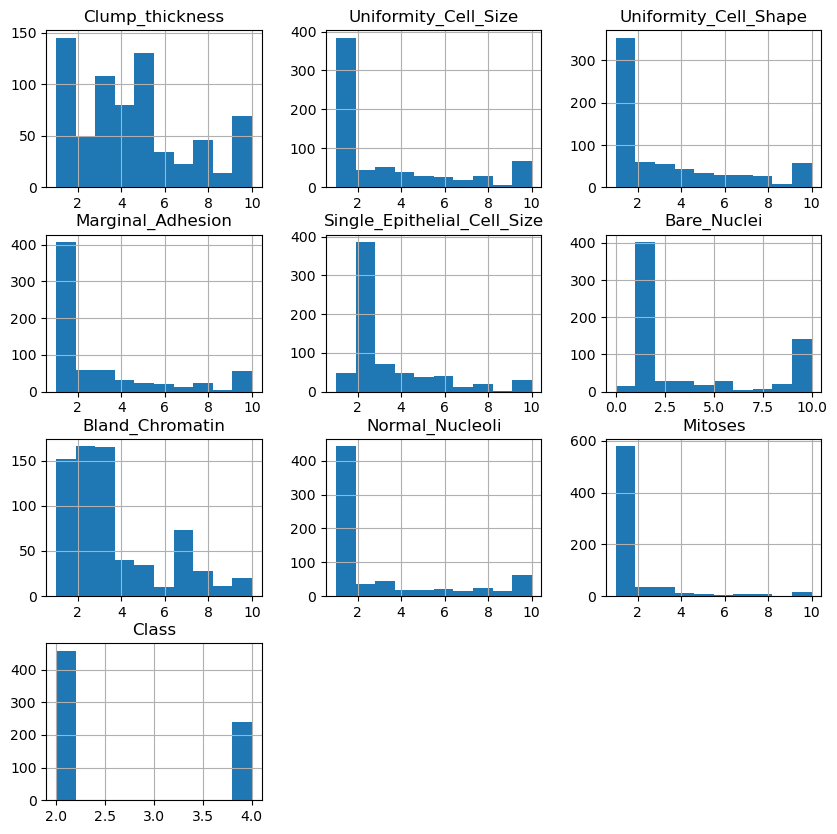

In [9]:
df.hist(figsize=(10, 10))
plt.show()

## 10. Estimate correlation coefficients and represent using heatmaps

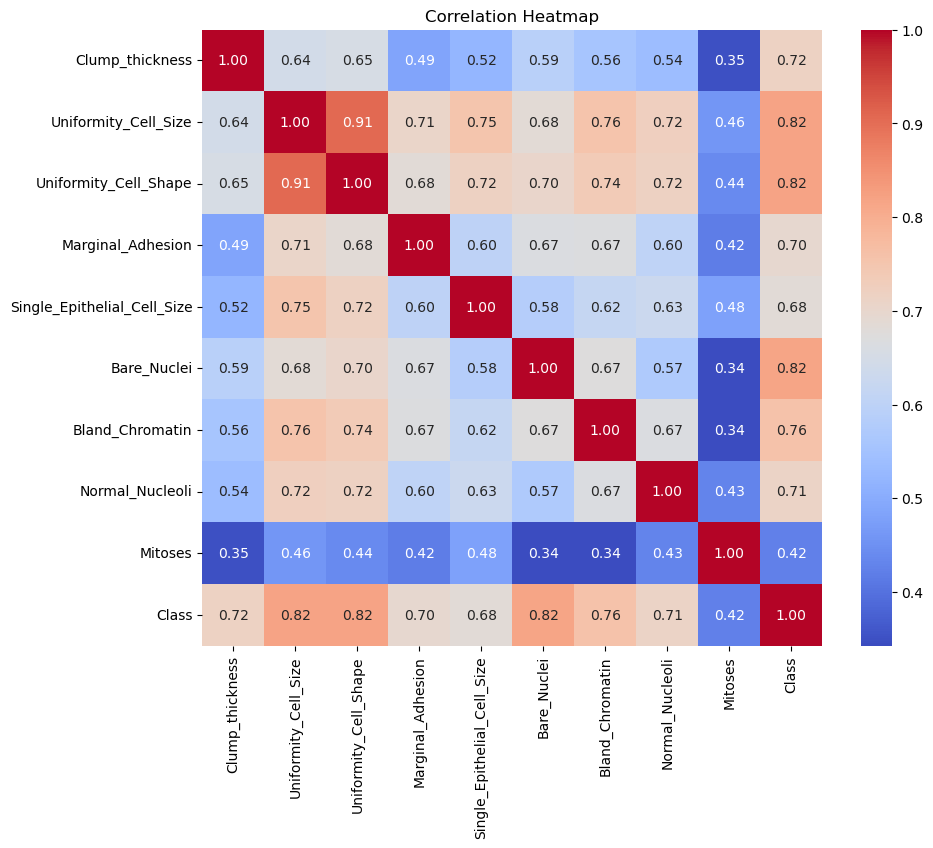

In [10]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 11. Declare feature vector and target variable

In [11]:
y = df['Class']
X = df.drop('Class', axis=1)


In [12]:
X

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [13]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

## 12. Split data into separate training and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [15]:
X_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
129,1,1,1,1,10,1,1,1,1
574,10,9,7,3,4,2,7,7,1
445,2,1,1,1,2,1,1,1,1
488,3,6,4,10,3,3,3,4,1
605,10,5,10,3,5,8,7,8,3
...,...,...,...,...,...,...,...,...,...
8,2,1,1,1,2,1,1,1,5
73,9,4,5,10,6,10,4,8,1
400,3,10,8,7,6,9,9,3,8
118,1,1,1,1,4,3,1,1,1


In [16]:
X_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
273,7,2,4,1,3,4,3,3,1
586,8,10,10,10,6,10,10,10,1
356,5,3,3,1,3,3,3,3,3
509,2,1,1,1,2,1,1,1,1
636,10,10,7,8,7,1,10,10,3
...,...,...,...,...,...,...,...,...,...
149,8,8,7,4,10,10,7,8,7
676,1,1,2,1,2,1,2,1,1
538,4,1,1,1,2,1,2,1,1
475,3,1,1,1,2,1,1,1,1


In [17]:
y_train

129    2
574    4
445    2
488    4
605    4
      ..
8      2
73     4
400    4
118    2
206    4
Name: Class, Length: 559, dtype: int64

In [18]:
y_test

273    4
586    4
356    4
509    2
636    4
      ..
149    4
676    2
538    2
475    2
567    2
Name: Class, Length: 140, dtype: int64

## 13. Perform Feature Scaling(Normalize)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[-1.1927987 , -0.69890591, -0.74425962, ..., -0.99114215,
        -0.59951014, -0.33785545],
       [ 1.98736572,  1.8991882 ,  1.24003829, ...,  1.48967186,
         1.37569322, -0.33785545],
       [-0.8394471 , -0.69890591, -0.74425962, ..., -0.99114215,
        -0.59951014, -0.33785545],
       ...,
       [-0.48609549,  2.22394996,  1.5707546 , ...,  2.31660987,
         0.05889098,  3.92675216],
       [-1.1927987 , -0.69890591, -0.74425962, ..., -0.99114215,
        -0.59951014, -0.33785545],
       [ 1.98736572,  2.22394996,  1.90147092, ..., -0.16420415,
         0.7172921 , -0.33785545]])

In [21]:
X_test

array([[ 0.92731091, -0.37414414,  0.24788933, ..., -0.16420415,
         0.05889098, -0.33785545],
       [ 1.28066251,  2.22394996,  2.23218724, ...,  2.73007887,
         2.3632949 , -0.33785545],
       [ 0.22060771, -0.04938238, -0.08282698, ..., -0.16420415,
         0.05889098,  0.88060387],
       ...,
       [-0.13274389, -0.69890591, -0.74425962, ..., -0.57767315,
        -0.59951014, -0.33785545],
       [-0.48609549, -0.69890591, -0.74425962, ..., -0.99114215,
        -0.59951014, -0.33785545],
       [-0.13274389, -0.69890591, -0.74425962, ..., -0.57767315,
        -0.59951014, -0.33785545]])

## 14. Fit the K Neighbours Classifier to the training set

In [22]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 15. Predict test-set results 

In [23]:
y_pred = classifier.predict(X_test)

y_pred

array([2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 2], dtype=int64)

## 16. Check the accuracy score 

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.9357142857142857
Precision: 0.9361111111111112
Recall: 0.9357142857142857
F1 Score: 0.9358613761928678


## 17. Compare the train-set and test-set accuracy

In [25]:
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)
print("Train set Accuracy:", train_accuracy)
print("Test set Accuracy:", test_accuracy)

Train set Accuracy: 0.9821109123434705
Test set Accuracy: 0.9357142857142857


## 18. Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9)

In [26]:
k_values = [3, 4, 5, 6, 7, 8, 9]
results = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([k, accuracy, precision, recall, f1])

print(tabulate(results, headers=['K', 'Accuracy', 'Precision', 'Recall', 'F1-score'], tablefmt='grid'))

+-----+------------+-------------+----------+------------+
|   K |   Accuracy |   Precision |   Recall |   F1-score |
+=====+============+=============+==========+============+
|   3 |   0.935714 |    0.936111 | 0.935714 |   0.935861 |
+-----+------------+-------------+----------+------------+
|   4 |   0.935714 |    0.935507 | 0.935714 |   0.935559 |
+-----+------------+-------------+----------+------------+
|   5 |   0.935714 |    0.936111 | 0.935714 |   0.935861 |
+-----+------------+-------------+----------+------------+
|   6 |   0.942857 |    0.942857 | 0.942857 |   0.942857 |
+-----+------------+-------------+----------+------------+
|   7 |   0.935714 |    0.936111 | 0.935714 |   0.935861 |
+-----+------------+-------------+----------+------------+
|   8 |   0.935714 |    0.936111 | 0.935714 |   0.935861 |
+-----+------------+-------------+----------+------------+
|   9 |   0.935714 |    0.936111 | 0.935714 |   0.935861 |
+-----+------------+-------------+----------+-----------

## 19. Tabulate the results using the Tabulate package

In [27]:
selected_columns = [[row[0], row[1], row[2]] for row in results]

print(tabulate(selected_columns, headers=['K', 'Train Accuracy', 'Test Accuracy']))

  K    Train Accuracy    Test Accuracy
---  ----------------  ---------------
  3          0.935714         0.936111
  4          0.935714         0.935507
  5          0.935714         0.936111
  6          0.942857         0.942857
  7          0.935714         0.936111
  8          0.935714         0.936111
  9          0.935714         0.936111


## 20. Display confusion matrix

<Axes: >

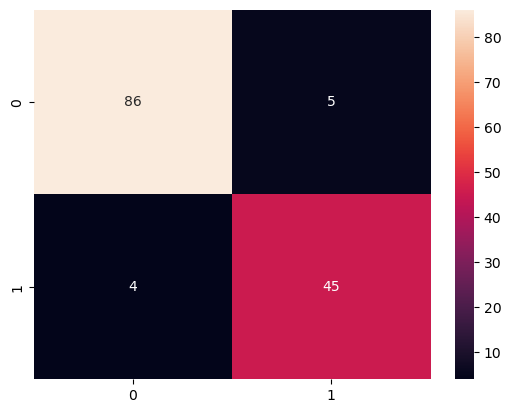

In [28]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

## 21. Generate classification report

In [29]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.95      0.95        91
           4       0.90      0.92      0.91        49

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



## 22. Evaluate classification error

In [30]:
error = np.mean(y_pred != y_test)
print("Classification Error:", error)

Classification Error: 0.06428571428571428


## 23. Generate ROC curve and ROC AUC score.

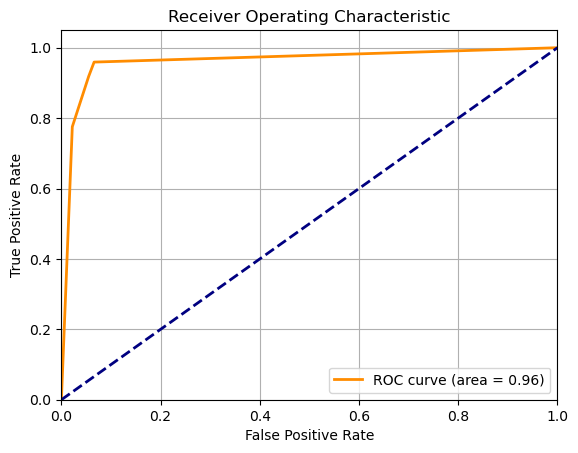

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)


y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.grid()
plt.legend(loc="lower right")
plt.show()

## 24. Perform k-fold validation

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from tabulate import tabulate

# Step 24: Perform k-fold validation with metrics
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(X_train_fold, y_train_fold)
    y_pred_fold = classifier.predict(X_test_fold)
    
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold, average='weighted')
    recall = recall_score(y_test_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Tabulate the fold_results
fold_results = []
for i in range(5):
    fold_results.append([i+1, accuracy_scores[i], precision_scores[i], recall_scores[i], f1_scores[i]])

# Calculate mean and standard deviation
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)

fold_results.append(["Mean", mean_accuracy, mean_precision, mean_recall, mean_f1])
fold_results.append(["Standard Deviation", std_accuracy, std_precision, std_recall, std_f1])

print(tabulate(fold_results, headers=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score'], tablefmt='grid'))


+--------------------+------------+-------------+------------+------------+
| Fold               |   Accuracy |   Precision |     Recall |   F1-score |
+====================+============+=============+============+============+
| 1                  | 0.971429   |  0.971538   | 0.971429   | 0.971253   |
+--------------------+------------+-------------+------------+------------+
| 2                  | 0.957143   |  0.957169   | 0.957143   | 0.956941   |
+--------------------+------------+-------------+------------+------------+
| 3                  | 0.964286   |  0.964556   | 0.964286   | 0.964367   |
+--------------------+------------+-------------+------------+------------+
| 4                  | 0.978571   |  0.978784   | 0.978571   | 0.978623   |
+--------------------+------------+-------------+------------+------------+
| 5                  | 0.956835   |  0.959215   | 0.956835   | 0.95719    |
+--------------------+------------+-------------+------------+------------+
| Mean      

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, y, cv=kf)
print("Cross-validated Accuracy:", scores.mean())

Cross-validated Accuracy: 0.9656526207605344
